# Predicting the wine type

The following study uses UCI machine learning repository wine quality data set (https://archive.ics.uci.edu/ml/datasets/wine+quality). The features include both physical and chemical properties. The main focus of the study is to predict the wine type (red or white). First, the distribution of wine type is analyzed based on different features. Then the most correlated features are tried to be distinguished (If there are. Neural networks are implemented by starting from scratch, to determine the wine type and the predictions were plot using the decision boundry.Then the same study was carried out using all the features.The features are combined and shrink into two main components using Principal Component Analysis (PCA).

Starting the study by importing the required modules for numerical calculations, data wrangling and plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Loading the data set

The data contains a file for each wine type.The data files are loaded and the top five entries are listed.A seperate column is created to assign a boolean value to recognize the data type.'type'=1 for red wine, while o is for white.

In [2]:
df_red=pd.read_csv('winequality-red.csv', sep=';')

print('The top entries for red wine:\n\n',df_red.head())

df_red['type']=1 

The top entries for red wine:

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8



repeating the same for white wine (assign type=0 for white wine)

In [3]:
df_white=pd.read_csv('winequality-white.csv', sep=';')

print('The top entries white wine:',df_white.head())

df_white['type']=0

The top entries white wine:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5    

Combine both white and red wine data frames into a single one and name it 'df_wine'.

In [4]:
df_wine=df_red.append(df_white)

Take the highly correlated 'k' number of features and plot a pair plot to understand highest coreelated features with respect to feature 'type'

In [5]:
def plotting_pair_pot(k,df,column_name):
    
    correlation=df.corr()
    cols=correlation.nlargest(n=k,columns=column_name)[column_name].index # getting highly correlated features
    sns.pairplot(df[cols])


In [6]:
k=5

plotting_pair_pot(k,df_wine,'type') 

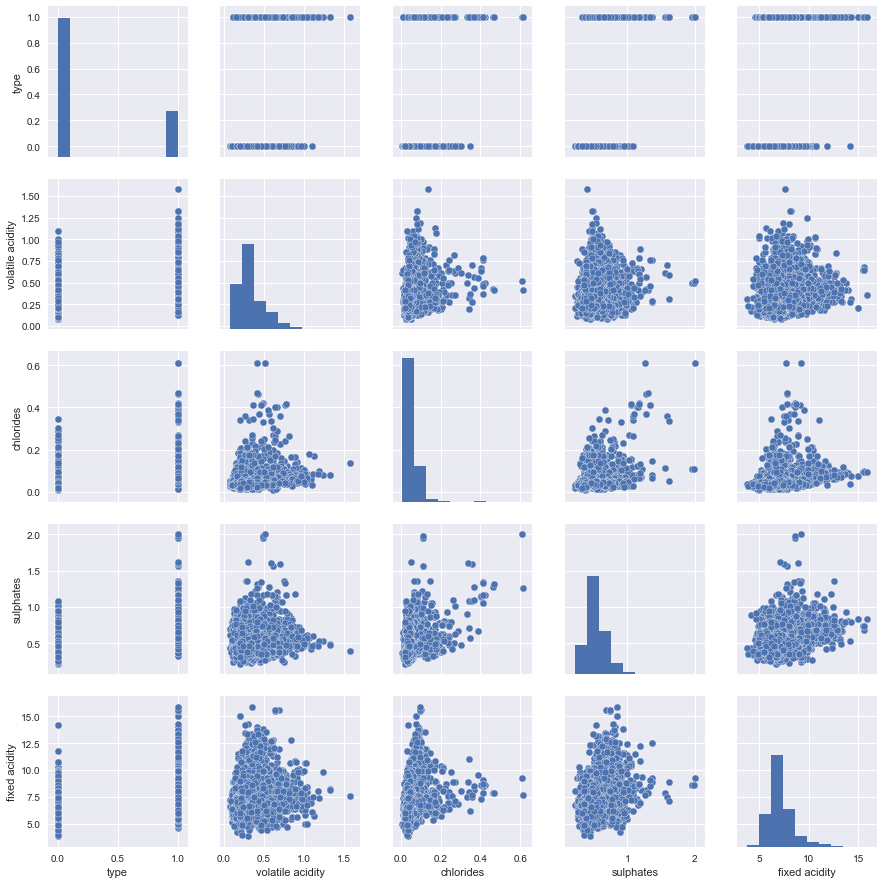

In [7]:
plt.show()

The distribution of wine type with the 'quality' is expected to be investigated. First, the maximum number of quality values  should be calculated. 'max_category_vals' function takes two data frames as two arguments and calculate the maximum unique values for a given categorical feature.

In [8]:
def max_category_vals(feature_name,df1,df2):
    
    feature_vals_df1=df1[feature_name].unique()
    feature_vals_df2=df2[feature_name].unique()
    category_vals=[]
    
    if (feature_vals_df1.shape[0] > feature_vals_df2.shape[0]):
        category_vals=df1[feature_name].unique()
    else:
        category_vals=df2[feature_name].unique()
   
    
    return category_vals

In [9]:
max_qulaity_vals=max_category_vals('quality',df_white,df_red)

print("The maximum quality values: ",len(max_qulaity_vals))

The maximum quality values:  7


The method 'count_category' gives the total values of given categorical feature 'quality'.

In [11]:
def count_category(feature_name,df,max_qulity_vals):
    
    
    feature_vals=np.sort(max_qulaity_vals) # sorting values from lower to higher
    count_type=[] # creating a list to count each quality value
    for i in range(len(feature_vals)):
   
        count_type.append(df_white[df_white['quality']==feature_vals[i]].shape[0])

    # getting all the quality values from df_wine    
    data={'quality':feature_vals, 'total_count':count_type}

    df_type_feature=pd.DataFrame(data)
    return df_type_feature

creating a new data structure for categorical feature 'quality' and see the distribution of wine 'type'

In [12]:
df_white_quality=count_category('quality',df_white,max_qulaity_vals)

df_red_quality=count_category('quality',df_red,max_qulaity_vals)




plotting a bar chart with the distrivution of the quantity of  each wine type against the 'quality'

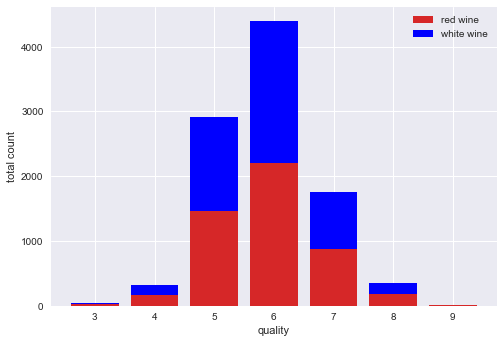

In [13]:
p1=plt.bar(df_red_quality['quality'],df_red_quality['total_count'],color='#d62728')
p2=plt.bar(df_white_quality['quality'],df_white_quality['total_count'],
           color='blue',bottom=df_red_quality['total_count'])

plt.xlabel('quality')
plt.ylabel('total count')
plt.legend(['red wine','white wine'])
plt.show()

plotting 'quality Vs 'fixed acidity' for each wine type.

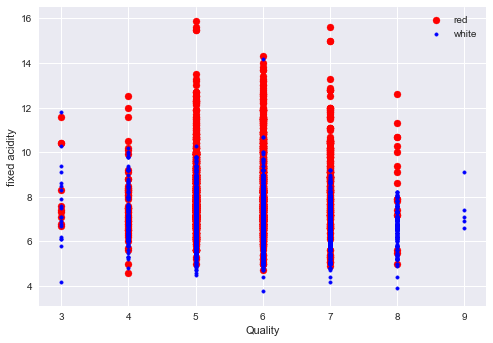

In [14]:
plt.scatter( df_red['quality'],df_red['fixed acidity'], color='red')
plt.scatter(df_white['quality'],df_white['fixed acidity'],color='blue', marker='.')
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.legend(['red','white'])
plt.show()

calculating the correlation matrics for each pair of fetaures and plotting it as a heat map.

In [15]:
correlation=df_wine.corr()

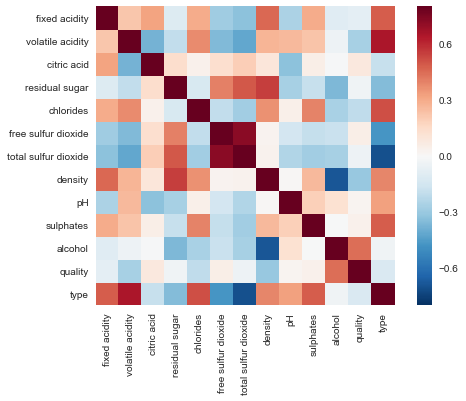

In [16]:
#plt.subplots(figsize=(12,10))
sns.heatmap(correlation,vmax=0.8,square=True)
plt.yticks(rotation=0) # rotate tick labels to clear vicibility
plt.xticks(rotation=90) 
plt.show()

Calulating and printing the most corelated series for 'type'. Here the features that correlation value > 0.1 are selected.

In [17]:
corr_type=correlation['type']

corr_type=corr_type[np.abs(corr_type)>.1]

corr_type=corr_type.drop('type') # dropping the 'type' as it's corelated with it self with 1

The top portion of df_wine data frame contains red wine data and the bottom portion contains white wine data.To make them more efficient and reasonable training sample they have o be shuffled. 

In [18]:
df_wine = df_wine.sample(frac=1).reset_index(drop=True)

Extracting the two highest correlated features.

In [19]:
two_max_corr=(abs(corr_type)).nlargest(n=2)

print("The two most highly correlated features are:%s and %s " % (two_max_corr.index[0],two_max_corr.index[1]))

X=df_wine[two_max_corr.index]

y=df_wine['type'].values

The two most highly correlated features are:total sulfur dioxide and volatile acidity 


To make sure that the gradient descent algorithm reaches the global minima efficiently, it's required to standardize the features.

In [20]:
from sklearn.preprocessing import StandardScaler


stdsc=StandardScaler()

X_train_std=stdsc.fit_transform(X)

X=X_train_std

Before using the X and y dataset, they are converted into the shape of nx X m where nx: number of features and m: number of training samples.

In [21]:
X=X.T 

y=np.reshape(y,(1,y.shape[0]))

Accessing and printing the shapes of data set we have.

In [22]:
shape_X = X.shape

shape_y = y.shape

m = X.shape[1]  # training set size

In [23]:
print ('The shape of X is: ' + str(shape_X))
print ('The shape of y is: ' + str(shape_y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 6497)
The shape of y is: (1, 6497)
I have m = 6497 training examples!


Creating the training and testing sample classes.

In [24]:
def train_test_split(X,y,train_prec):
    
    row_nu=int(round(X.shape[1]*train_prec))
    
    X_train=X[:,:row_nu]
    X_test=X[:,row_nu:]
    y_train=y[:,:row_nu]
    y_test=y[:,row_nu:]
    
    return X_train, X_test,y_train,y_test

In [25]:
X_train, X_test,y_train,y_test=train_test_split(X,y,0.9)

# Creating a  neural network

The feed orwrd neural network that we are going to use will include one input layer (X), one hidden layer(h) and an out put layer (y_hat).The input layer includes three nodes which represent the number of features of X (which is 2) combined with a single value bias(b).Here, we are going to use one hidden layer.The number of nodes can be varied as the cost going to miimized.Since we are expecting a single out put(1 or 0 to represent the wine type) we have only one node in the out put layer.

<img src="Neural_net_imagee.png">

In this perticular case, 4 nodes are using for the hidden layer.

In [26]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0]     # size of input layer
    n_h = 4              # I choosed this to be approximately double of input nodes
    n_y = Y.shape[0]     # size of output layer
    
    return (n_x, n_h, n_y)


In [27]:
(n_x, n_h, n_y) = layer_sizes(X, y)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))


The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


First we try to initiate the weights to small random numbers.The reason that the weights are not assigned to the same value is that we have to make sure the symmetry is broken for each feature. To make sure z values (z= AX + b), are in the linear region of the activation region,we used multiplied random values by 0.01. Bias values are assigned to zero, since we already broke the symmetry by assigning weights into random numbers.

In [28]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
   
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Testing the parameters:

In [33]:
parameters = initialize_parameters(n_x, n_h, n_y)


print("W1 = \n" + str(parameters["W1"]))
print("\nb1 =\n " + str(parameters["b1"]))
print("\nW2 = \n" + str(parameters["W2"]))
print("\nb2 = \n" + str(parameters["b2"]))


W1 = 
[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]

b1 =
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

W2 = 
[[-0.01057952 -0.00909008  0.00551454  0.02292208]]

b2 = 
[[ 0.]]


As you can see the W values are assigned randomly between + .01 and -.01,  with out symmetry, while b values are assigned to zero.

Initializing the activation function sigmoid.

<img src="sigmoid.png">

In [29]:
def sigmoid(z):

    s = 1/(1+np.exp(-z))
    
    return s


Now we are caluclating forward propergation for each layer.Although folowwing figure has 4 layers, we only have 3 layers and we have only one node for the output.




<img src="forward_prop.jpe">

image source: http://www.ritchieng.com/neural-networks-learning/

The calculated Z and A values are stored in a cache, so we can use them for the backpropergation.

In [34]:

def forward_prop(X, parameters):
    
  
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    
    Z1 = np.dot((W1),X)+b1
    A1 = np.tanh(Z1)
  
    Z2 = np.dot((W2),A1)+b2
    A2 = sigmoid(Z2)
    
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [35]:
A2, cache= forward_prop(X, parameters)

Printing the calulated z values and their corresponding A values.

In [39]:
print("\n Z1: \n",cache['Z1'] ,"\n\n A1: \n",cache['A1'],"\n\n Z2: \n",cache['Z2'],"\n\n A2: \n",cache['A2'])


 Z1: 
 [[-0.00308824  0.00347269  0.00516681 ...,  0.00506711 -0.00217268
   0.00341764]
 [-0.01930513  0.02955496  0.05346899 ...,  0.03362707 -0.03335728
   0.06149093]
 [-0.01220911  0.01128956  0.01384485 ...,  0.01942564 -0.00244144
   0.00103626]
 [ 0.00609285 -0.01219384 -0.02460798 ..., -0.01132584  0.01775108
  -0.03406381]] 

 A1: 
 [[-0.00308823  0.00347268  0.00516677 ...,  0.00506707 -0.00217268
   0.00341763]
 [-0.01930273  0.02954636  0.0534181  ...,  0.0336144  -0.03334491
   0.06141355]
 [-0.01220851  0.01128908  0.01384396 ...,  0.0194232  -0.00244144
   0.00103626]
 [ 0.00609277 -0.01219324 -0.02460302 ..., -0.01132536  0.01774921
  -0.03405064]] 

 Z2: 
 [[ 0.00028047 -0.00052256 -0.00102785 ..., -0.00051166  0.00071948
  -0.00136921]] 

 A2: 
 [[ 0.50007012  0.49986936  0.49974304 ...,  0.49987209  0.50017987
   0.4996577 ]]


The cost is calculated using the following equation.This reperesnts the descripency between the calculated values A2 (or y_hat) and the real values y. Value 'K' reperesents the each output feature(in this case 1) while 'm' represents the number of samples



<img src="cost_function.png">

In [41]:
def compute_cost(A2, Y, parameters):
   
    
    m = Y.shape[1] # number of example


    logprobs = (np.multiply(np.log(A2),Y) +np.multiply((np.log(1-A2)),(1-Y)))
    cost = -np.sum(logprobs)/m
    
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

Printing the cost after one iteration.

In [42]:
print("cost = " + str(compute_cost(A2, y, parameters)))

cost = 0.693357573222


In order to minimize the cost, the parameters(W,b) have to be updated.To reach the minimal cost value with respect to each feature, the 'gradient descent' algorith is used.

<img src="gradient_descent.png">

Image source: https://sebastianraschka.com/faq/docs/visual-backpropagation.html

Back propagation in a schematic diagramme:

<img src="back_prop1.png">



The gradients (or 'grad') values are calculated for each parameters. The parameters then updated with these grad values so the cost function should be eventually minimized.For instance, w_new= W_old-alpha*dw , updates the weight.


In [43]:
def backward_prop(parameters, cache, X, Y):
 
    m = X.shape[1]
    
    # accessing 'W' values from the 'parameters'.  
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
        
    # Accessing activation 'A' values from the 'cache'
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    
    # calculating gradients for each parameter
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,(A1.T))/m
    db2 = np.sum(dZ2, axis=1,keepdims=True)/m
    dZ1 = np.multiply(np.dot((W2.T),dZ2),(1-np.power(A1,2)))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    # Creating a list with calculated grad values.
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

Calculating gradient values and testing the function.

In [44]:
grads = backward_prop(parameters, cache, X, y)


print ("dW1 = \n"+ str(grads["dW1"]))
print ("\n\ndb1 = \n"+ str(grads["db1"]))
print ("\n\ndW2 = \n"+ str(grads["dW2"]))
print ("\n\ndb2 = \n"+ str(grads["db2"]))

dW1 = 
[[-0.00319267  0.00297743]
 [-0.00273738  0.00255223]
 [ 0.00166337 -0.00155182]
 [ 0.00691479 -0.00644676]]


db1 = 
[[-0.00268598]
 [-0.00230872]
 [ 0.00139982]
 [ 0.00582034]]


dW2 = 
[[-0.00109936 -0.01105485 -0.00304256  0.00502134]]


db2 = 
[[ 0.25388644]]


The parameters are carefully updated as they reach a minimal efficiently. If the updating steps are huge, then it won't reach a minimal value and if update steps are tiny, then it's computationally expensive.


<img src="update_para.png">

Image source: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/


In [46]:
def update_parameters(parameters, grads, learning_rate = 1.2):
  

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
  
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


Updating the parameters and printing the each updated parameter value.

In [47]:
parameters = update_parameters(parameters, grads)

print("W1 =\n " + str(parameters["W1"]))
print("\n\nb1 = \n" + str(parameters["b1"]))
print("\n\nW2 = \n" + str(parameters["W2"]))
print("\n\nb2 =\n " + str(parameters["b2"]))

W1 =
 [[-0.00033638 -0.00413559]
 [-0.01807711  0.01334004]
 [-0.0199304  -0.00655529]
 [-0.00326893 -0.00471677]]


b1 = 
[[ 0.00322318]
 [ 0.00277047]
 [-0.00167978]
 [-0.00698441]]


W2 = 
[[-0.00926029  0.00417574  0.00916561  0.01689647]]


b2 =
 [[-0.30466373]]


Let's create a neural network using all the necessary functions that we have defined.

In [52]:
def neural_network(X, Y, n_h, num_iterations = 1000):
   
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    
    # iterate the pre defined number of iterations

    for i in range(0, num_iterations):
         
        # Forward propargation
        A2, cache = forward_prop(X, parameters)
        
        # Cost function.
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation.
        grads = backward_prop(parameters, cache, X, Y)
 
        # Updating parameters using Gradient descent.
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        
        
        # Print the cost every 1000 iterations
        if  i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

executing the built neural network model.

In [55]:
parameters = neural_network(X, y, 4, num_iterations=5000)

print("\n\nW1 =\n " + str(parameters["W1"]))
print("\n\nb1 = \n" + str(parameters["b1"]))
print("\n\nW2 =\n " + str(parameters["W2"]))
print("\n\nb2 = \n" + str(parameters["b2"]))

Cost after iteration 0: 0.693358
Cost after iteration 1000: 0.120180
Cost after iteration 2000: 0.119911
Cost after iteration 3000: 0.119792
Cost after iteration 4000: 0.119707


W1 =
 [[ 1.17833041 -1.07356218]
 [-2.3443378  -0.1959057 ]
 [-0.95982795  0.50746195]
 [-0.49186171  1.2964992 ]]


b1 = 
[[ 0.07121804]
 [-2.41016927]
 [-1.12024337]
 [-0.32896283]]


W2 =
 [[-1.32946733  1.5092762   1.78719857  1.52346355]]


b2 = 
[[-0.42087138]]




Making the predictions:

In [59]:
def predict(parameters, X):

    A2, cache = forward_prop(X, parameters)
    predictions = (A2 >0.5) # this will give a boolean array.For this case this is fine since outputs are 1 and 0.

    return predictions

In [60]:
predictions = predict(parameters, X_train)

print("predictions mean = " + str(np.mean(predictions)))

print ('Training Accuracy: %d' % float((np.dot(y_train,predictions.T) + np.dot(1-y_train,1-predictions.T))/float(y_train.size)*100) + '%')



predictions mean = 0.244227809133
Training Accuracy: 95%
